# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [25]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("x_train shape:", x_train.shape)
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print(y_train[5999])
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[5999])

x_train shape: (60000, 28, 28)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Build the model

In [11]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

## Train the model

In [18]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0306 - val_accuracy: 0.9920
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0315 - accuracy: 0.9895 - val_loss: 0.0280 - val_accuracy: 0.9925
Epoch 3/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0278 - accuracy: 0.9908 - val_loss: 0.0266 - val_accuracy: 0.9922
Epoch 4/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0274 - accuracy: 0.9904 - val_loss: 0.0303 - val_accuracy: 0.9923
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0287 - val_accuracy: 0.9923
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0273 - accuracy: 0.9910 - val_loss: 0.0261 - val_accuracy: 0.9920
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0256 - accuracy: 0.9914 - val_loss: 0.0267 - val_accuracy: 0.9925
Epoch 

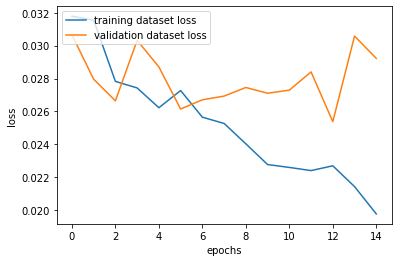

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training dataset loss', 'validation dataset loss'], loc='upper left')
plt.show()

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Evaluate the trained model

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022217968478798866
Test accuracy: 0.9922000169754028


# Make predictions

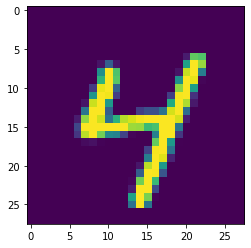

In [26]:
import matplotlib.pyplot as plt
index=910
plt.imshow(x_test[index,:,:,0])


In [17]:
pred=model.predict(x_test)

print(pred[index])

print(y_test[index])

[2.1662209e-14 3.9290749e-12 1.2559156e-12 7.8570706e-13 1.0000000e+00
 8.6995147e-11 6.5488636e-15 2.1514204e-08 1.7201811e-10 2.2857590e-08]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
